## Experiment #2 results and analysis

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

In [2]:
import statsmodels ## version 0.10.1 -- the only version tested
import scipy.stats as stats
from statsmodels.stats.multicomp import MultiComparison

This notebook contains the analysis of data obtained from the second experiment with 293A HEK cells.  
The genetically engineered cells, expressing the ER stress biosensor XBP1-TagRFP, were produced as the model system.  
A group of cells, constantly expressing TagRFP, was used as a positive control.  
The cells with TagRFP expression induced under ER stress conditions are referred as experimental group.  
The cells were treated with different concentrations of Tunicamycin and DMSO.  
Cells were counted and the numbers of red cells were obtained with CellCountCV, the percentages of red cells were calculated.  

### Read the data table

In [3]:
rslt_ex2 = pd.read_excel('SupplementaryTables2_bioRxiv.xlsx')

In [4]:
rslt_ex2.head()

,FoV,Order,Cells,Red intensity >= 30,Red intensity >= 50,Red intensity >= 100,Red_30_%,Red_50_%,Red_100_%,Group,Option,Intron,Tunicamycin,DMSO,Label
0,1,1,354.717160,94.281087,62.278639,24.567110,26.579229,17.557267,6.925831,A,1,1,0,0.0,RFP+
1,1,2,323.835059,94.206598,56.579416,20.405980,29.090920,17.471677,6.301350,A,1,1,0,0.0,RFP+
2,1,3,332.929231,97.290473,64.442648,23.253789,29.222569,19.356260,6.984604,A,1,1,0,0.0,RFP+
3,1,4,323.836716,97.848846,63.141605,21.438118,30.215489,19.497976,6.620039,A,1,1,0,0.0,RFP+
4,1,5,332.451361,106.258979,67.213595,24.568879,31.962263,20.217572,7.390218,A,1,1,0,0.0,RFP+


**Experimental and control groups:**  
  
**Label = Tu or RFP+**  
- **Tu**   - plasmid with intron - responding to ER stress (Intron == 1)
- **RFP+** - plasmid without intron - constantly express RFP and don't respond to ER stress (positive control)
  
  
    - Group in (A and B) & Option == 1 -- negative control, Tunicamycin = 0 ug/ml
    - Group in (A and B) & Option == 2 -- Tunicamycin = 5 ug/ml
    - Group in (A and B) & Option == 3 -- Tunicamycin = 10 ug/ml
    - Group in (A and B) & Option == 4 -- Tunicamycin = 15 ug/ml  
  
  
**Label = DMSO** -- DMSO effect studies (negative control):  
    - Group in (A and B) & Option == 1 -- negative control, DMSO = 0 ug/ml
    - Group in (A and B) & Option == 2 -- DMSO = 0.5%
    - Group in (A and B) & Option == 3 -- DMSO = 1.0%
    - Group in (A and B) & Option == 4 -- DMSO = 1.5%


### Statistical analysis and plots

#### Mann-Whitney tets between final observations for all the groups

In [5]:
lastone = rslt_ex2[rslt_ex2.Order == 24 ]
lastone = lastone.melt(id_vars = ['Label', 'FoV', 'Order', 'Option' ])

firstone = rslt_ex2[rslt_ex2.Order == 1 ]
firstone = firstone.melt(id_vars = ['Label', 'FoV', 'Order', 'Option' ])

In [41]:
lastone3 = lastone[lastone.variable == 'Red_30_%']
lastone3.loc[lastone3.index, 'value'] = lastone3.value.astype('float32').values
data = lastone3['value'].astype('float32').values
labels = lastone3.Label.astype('str') + '-' + lastone3.Option.astype('str')

MultiComp2 = MultiComparison(data,
                             labels.values)
MultiComp2.allpairtest(stats.mannwhitneyu, method='Bonf')[0]

group1,group2,stat,pval,pval_corr,reject
DMSO-1,DMSO-2,135.0,0.1975,1.0,False
DMSO-1,DMSO-3,74.0,0.0012,0.0779,False
DMSO-1,DMSO-4,81.0,0.0032,0.2139,False
DMSO-1,RFP+-1,0.0,0.0,0.0,True
DMSO-1,RFP+-2,0.0,0.0,0.0,True
DMSO-1,RFP+-3,0.0,0.0,0.0,True
DMSO-1,RFP+-4,0.0,0.0,0.0,True
DMSO-1,Tu-1,116.0,0.0485,1.0,False
DMSO-1,Tu-2,78.0,0.0041,0.2674,False
DMSO-1,Tu-3,0.0,0.0,0.0,True


#### The plots demonstate total cell counts and percentage of red cells observed in different control and experimental groups 

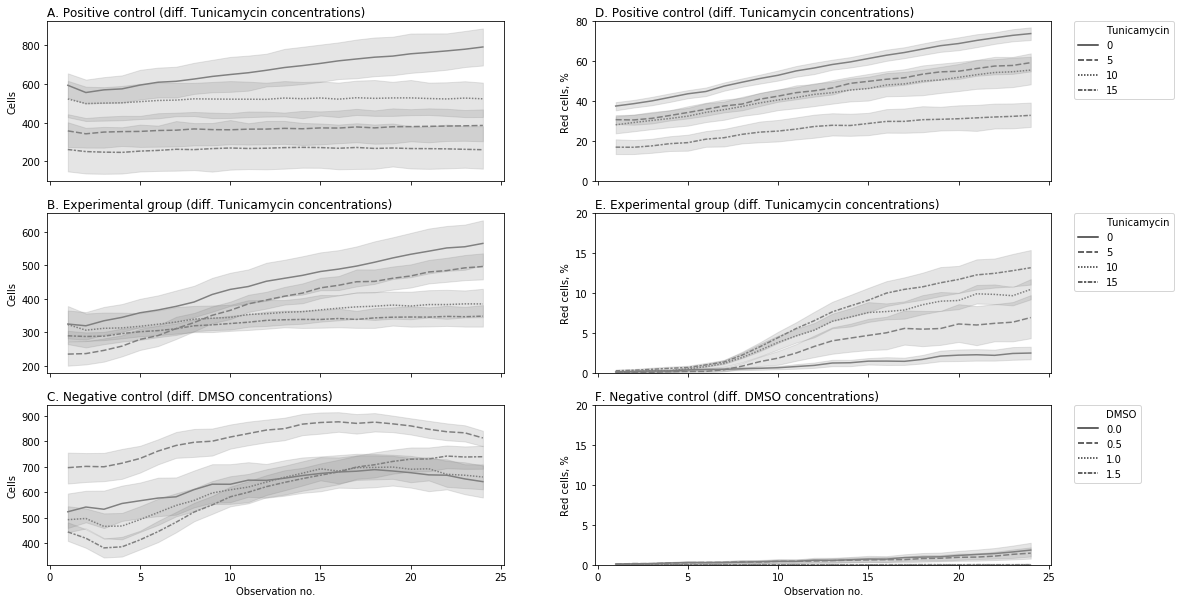

In [7]:
## the plots below demonstrate the original values from table
_, axs = plt.subplots(nrows = 3, ncols=2, figsize = (18, 10), sharex = True)
sns.lineplot(data = rslt_ex2[ rslt_ex2.Label == 'RFP+' ] [['Cells', 'Order', 'Tunicamycin']],
             x = 'Order',  style = 'Tunicamycin', y = 'Cells', color = '#808080', ax = axs[0,0], legend = None)

sns.lineplot(data = rslt_ex2[ rslt_ex2.Label == 'Tu' ] [['Cells', 'Order', 'Tunicamycin']],
             x = 'Order',  style = 'Tunicamycin', y = 'Cells', color = '#808080', ax = axs[1,0], legend = None)
    
sns.lineplot(data = rslt_ex2[ rslt_ex2.Label == 'DMSO' ][['Cells', 'Order', 'DMSO']],
             x = 'Order',  style = 'DMSO', y = 'Cells', color = '#808080', ax = axs[2, 0], legend = None)

sns.lineplot(data = rslt_ex2[ rslt_ex2.Label == 'RFP+' ] [['Red_30_%', 'Order', 'Tunicamycin']],
             x = 'Order',  style = 'Tunicamycin', y = 'Red_30_%', color = '#808080', ax = axs[0,1])

sns.lineplot(data = rslt_ex2[ rslt_ex2.Label == 'Tu' ] [['Red_30_%', 'Order', 'Tunicamycin']],
             x = 'Order',  style = 'Tunicamycin', y = 'Red_30_%', color = '#808080', ax = axs[1,1])
    
sns.lineplot(data = rslt_ex2[ rslt_ex2.Label == 'DMSO' ] [['Red_30_%', 'Order', 'DMSO']],
             x = 'Order',  style = 'DMSO', y = 'Red_30_%', color = '#808080', ax = axs[2, 1])

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

axs[0,1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axs[1,1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axs[2,1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

axs[0,0].set_ylabel('Cells')
axs[1,0].set_ylabel('Cells')
axs[2,0].set_ylabel('Cells')

axs[0,1].set_ylabel('Red cells, %')
axs[1,1].set_ylabel('Red cells, %')
axs[2,1].set_ylabel('Red cells, %')

axs[0,1].set_ylim(0, 80)
axs[1,1].set_ylim(0, 20)
axs[2,1].set_ylim(0, 20);

axs[2,0].set_xlabel('Observation no.')
axs[2,1].set_xlabel('Observation no.')

axs[0,0].set_title('A. Positive control (diff. Tunicamycin concentrations)', pad = 5., loc = 'left')
axs[1,0].set_title('B. Experimental group (diff. Tunicamycin concentrations)', pad = 5., loc = 'left')
axs[2,0].set_title('C. Negative control (diff. DMSO concentrations)', pad = 5., loc = 'left');

axs[0,1].set_title('D. Positive control (diff. Tunicamycin concentrations)', pad = 5., loc = 'left')
axs[1,1].set_title('E. Experimental group (diff. Tunicamycin concentrations)', pad = 5., loc = 'left')
axs[2,1].set_title('F. Negative control (diff. DMSO concentrations)', pad = 5., loc = 'left');

Next we will visualize the changes in total cell counts and red cells percentage observed in different control and experimental groups.

In [8]:
## the changes in red cells percentage in RFP+
tdf = rslt_ex2[ rslt_ex2.Label == 'RFP+'  ] [['Red_30_%', 'Group', 'FoV', 'Order', 'Tunicamycin']]
tdf = tdf.pivot_table(index=['Group','FoV','Tunicamycin'], columns='Order')
tdf_red_rfp = ((tdf.T - tdf.iloc[:,0]).T ).stack().reset_index()

## the changes in red cells percentage in Tu
tdf = rslt_ex2[ rslt_ex2.Label == 'Tu'  ] [['Red_30_%', 'Group', 'FoV', 'Order', 'Tunicamycin']]
tdf = tdf.pivot_table(index=['Group','FoV','Tunicamycin'], columns='Order')
tdf_red_tu = ((tdf.T - tdf.iloc[:,0]).T ).stack().reset_index()

## the changes in red cells percentage in DMSO
tdf = rslt_ex2[ rslt_ex2.Label == 'DMSO'  ] [['Red_30_%', 'Group', 'FoV', 'Order', 'DMSO']]
tdf = tdf.pivot_table(index=['Group','FoV','DMSO'], columns='Order')
tdf_red_dmso = ((tdf.T - tdf.iloc[:,0]).T ).stack().reset_index()

In [9]:
## the changes in total cell counts in RFP+
tdf = rslt_ex2[ rslt_ex2.Label == 'RFP+'  ] [['Cells', 'Group', 'FoV', 'Order', 'Tunicamycin']]
tdf = tdf.pivot_table(index=['Group','FoV','Tunicamycin'], columns='Order')
tdf_cells_rfp = ((tdf.T - tdf.iloc[:,0]).T ).stack().reset_index()

## the changes in total cell counts in Tu
tdf = rslt_ex2[ rslt_ex2.Label == 'Tu'  ] [['Cells', 'Group', 'FoV', 'Order', 'Tunicamycin']]
tdf = tdf.pivot_table(index=['Group','FoV','Tunicamycin'], columns='Order')
tdf_cells_tu = ((tdf.T - tdf.iloc[:,0]).T ).stack().reset_index()

## the changes in total cell counts in DMSO
tdf = rslt_ex2[ rslt_ex2.Label == 'DMSO'  ] [['Cells', 'Group', 'FoV', 'Order', 'DMSO']]
tdf = tdf.pivot_table(index=['Group','FoV','DMSO'], columns='Order')
tdf_cells_dmso = ((tdf.T - tdf.iloc[:,0]).T ).stack().reset_index()

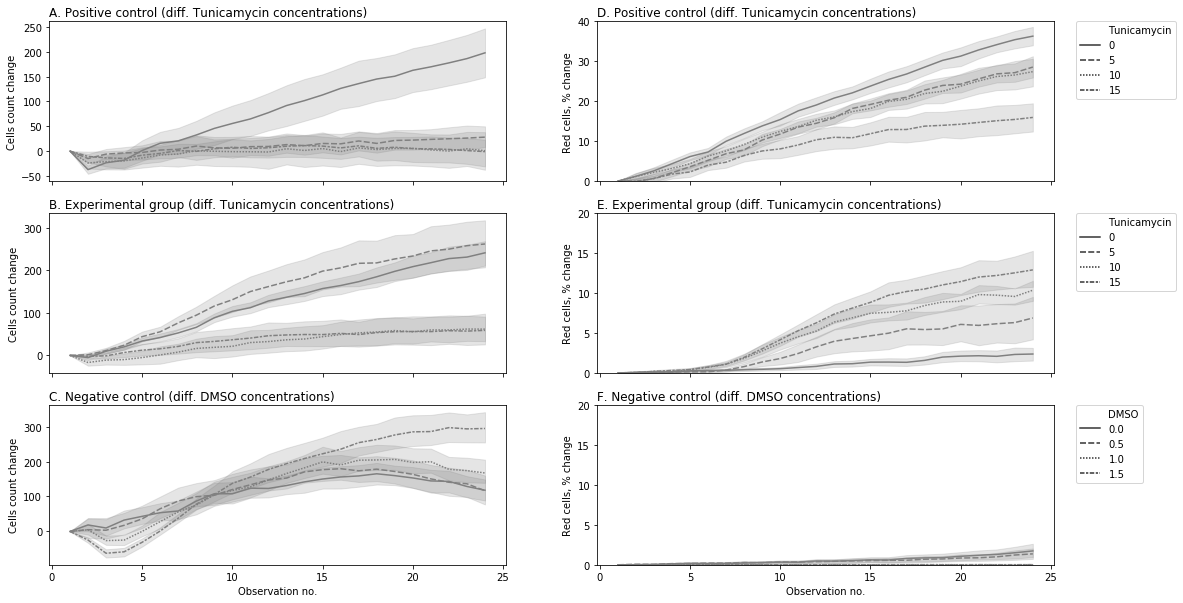

In [10]:
## the plots below demonstrate the changes in total cell counts and red cells percentage
_, axs = plt.subplots(nrows = 3, ncols=2, figsize = (18, 10), sharex = True)
sns.lineplot(data = tdf_cells_rfp,
             x = 'Order',  style = 'Tunicamycin', y = 'Cells', color = '#808080', ax = axs[0,0], legend = None)

sns.lineplot(data = tdf_cells_tu,
             x = 'Order',  style = 'Tunicamycin', y = 'Cells', color = '#808080', ax = axs[1,0], legend = None)
    
sns.lineplot(data = tdf_cells_dmso,
             x = 'Order',  style = 'DMSO', y = 'Cells', color = '#808080', ax = axs[2, 0], legend = None)

sns.lineplot(data = tdf_red_rfp,
             x = 'Order',  style = 'Tunicamycin', y = 'Red_30_%', color = '#808080', ax = axs[0,1])

sns.lineplot(data = tdf_red_tu,
             x = 'Order',  style = 'Tunicamycin', y = 'Red_30_%', color = '#808080', ax = axs[1,1])
    
sns.lineplot(data = tdf_red_dmso,
             x = 'Order',  style = 'DMSO', y = 'Red_30_%', color = '#808080', ax = axs[2, 1])

axs[0,1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axs[1,1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axs[2,1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

axs[0,0].set_ylabel('Cells count change')
axs[1,0].set_ylabel('Cells count change')
axs[2,0].set_ylabel('Cells count change')

axs[0,1].set_ylabel('Red cells, % change')
axs[1,1].set_ylabel('Red cells, % change')
axs[2,1].set_ylabel('Red cells, % change')

axs[0,1].set_ylim(0, 40)
axs[1,1].set_ylim(0, 20)
axs[2,1].set_ylim(0, 20);

axs[2,0].set_xlabel('Observation no.')
axs[2,1].set_xlabel('Observation no.')

axs[0,0].set_title('A. Positive control (diff. Tunicamycin concentrations)', pad = 5., loc = 'left')
axs[1,0].set_title('B. Experimental group (diff. Tunicamycin concentrations)', pad = 5., loc = 'left')
axs[2,0].set_title('C. Negative control (diff. DMSO concentrations)', pad = 5., loc = 'left');

axs[0,1].set_title('D. Positive control (diff. Tunicamycin concentrations)', pad = 5., loc = 'left')
axs[1,1].set_title('E. Experimental group (diff. Tunicamycin concentrations)', pad = 5., loc = 'left')
axs[2,1].set_title('F. Negative control (diff. DMSO concentrations)', pad = 5., loc = 'left');

On the boxplots below you can see the distributions of red cells percentage values in RFP+, Tu and DMSO groups treated with different concentrations of Tunicamycin and DMSO in the beginning and in the end of experiment.

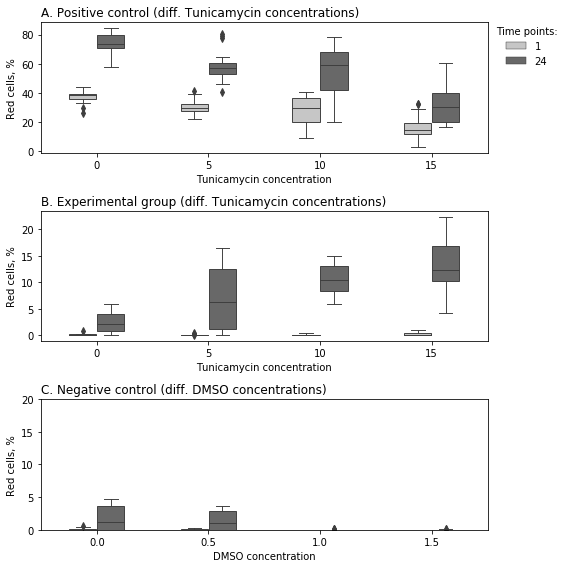

In [11]:
fig, axs = plt.subplots(figsize = (8, 8), nrows = 3, sharex = False)
sns.boxplot(data = rslt_ex2 [rslt_ex2.Order.isin([1,24]) & (rslt_ex2.Label == 'RFP+')],
            x = 'Tunicamycin', y = 'Red_30_%', ax = axs[0], dodge = True , hue = 'Order',
                 linewidth = .95, width = .5, palette = 'Greys');

sns.boxplot(data = rslt_ex2 [rslt_ex2.Order.isin([1,24]) & (rslt_ex2.Label == 'Tu')],
             x = 'Tunicamycin', y = 'Red_30_%', ax = axs[1], dodge = True, hue = 'Order',
                 linewidth = .95, width = .5, palette = 'Greys');

sns.boxplot(data = rslt_ex2 [rslt_ex2.Order.isin([1,24]) & (rslt_ex2.Label == 'DMSO')],
             x = 'DMSO', y = 'Red_30_%', ax = axs[2], dodge = True, hue = 'Order',
                 linewidth = .95, width = .5, palette = 'Greys');

axs[0].set_ylabel('Red cells, %');
axs[1].set_ylabel('Red cells, %');
axs[2].set_ylabel('Red cells, %');
axs[2].set_ylim([0,20]);

axs[0].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, frameon=False)
leg1 = axs[0].get_legend()
leg1.set_title('Time points:')
axs[1].legend([], [], frameon=False)
axs[2].legend([], [], frameon=False)

axs[0].set_title('A. Positive control (diff. Tunicamycin concentrations)', loc = 'left')
axs[1].set_title('B. Experimental group (diff. Tunicamycin concentrations)', loc = 'left')
axs[2].set_title('C. Negative control (diff. DMSO concentrations)', loc = 'left')

axs[0].set_xlabel('Tunicamycin concentration');
axs[1].set_xlabel('Tunicamycin concentration');
axs[2].set_xlabel('DMSO concentration');

fig.tight_layout()

##### Statistical comparison of red cells percentages observed in RFP+  

In [12]:
redp30_rfp   = rslt_ex2 [rslt_ex2.Order.isin([1,24]) & (rslt_ex2.Label == 'RFP+')]
lastone_rfp  = redp30_rfp[redp30_rfp.Order == 24]
firstone_rfp = redp30_rfp[redp30_rfp.Order == 1]

## comparison between the Tu dosage groups in the beginning of experiment
MultiComp2 = MultiComparison(firstone_rfp[['Red_30_%']] ,
                             firstone_rfp.Tunicamycin)
print (MultiComp2.allpairtest(stats.mannwhitneyu, method='Bonf')[0])

## comparison between the Tu dosage groups in the end of experiment
## the changes of red cells percentages were compared
MultiComp2 = MultiComparison(lastone_rfp[['Red_30_%']].values - firstone_rfp[['Red_30_%']].values ,
                             firstone_rfp.Tunicamycin)
print (MultiComp2.allpairtest(stats.mannwhitneyu, method='Bonf')[0])

Test Multiple Comparison mannwhitneyu 
FWER=0.05 method=Bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2  stat  pval  pval_corr reject
-------------------------------------------
     0      5  61.0 0.0007    0.0044   True
     0     10  64.0  0.001    0.0061   True
     0     15   5.0    0.0       0.0   True
     5     10 143.0 0.2792       1.0  False
     5     15  33.0    0.0    0.0001   True
    10     15  55.0 0.0004    0.0023   True
-------------------------------------------
Test Multiple Comparison mannwhitneyu 
FWER=0.05 method=Bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2  stat  pval  pval_corr reject
-------------------------------------------
     0      5  51.0 0.0002    0.0014   True
     0     10  53.0 0.0003    0.0018   True
     0     15   2.0    0.0       0.0   True
     5     10 149.0 0.3462       1.0  False
     5     15  31.0    0.0    0.0001   True
    10     15  45.0 0.0001    0.0007   True
-------------------------------------------


##### Statistical comparison of red cells percentages observed in Tu  

In [13]:
redp30_tu   = rslt_ex2 [rslt_ex2.Order.isin([1,24]) & (rslt_ex2.Label == 'Tu')]
lastone_tu  = redp30_tu[redp30_tu.Order == 24]
firstone_tu = redp30_tu[redp30_tu.Order == 1]

## comparison between the Tu dosage groups in the beginning of experiment
MultiComp2 = MultiComparison(firstone_tu[['Red_30_%']] ,
                             firstone_tu.Tunicamycin)
print (MultiComp2.allpairtest(stats.mannwhitneyu, method='Bonf')[0])

## comparison between the Tu dosage groups in the end of experiment
## the changes of red cells percentages were compared
MultiComp2 = MultiComparison(lastone_tu[['Red_30_%']].values - firstone_tu[['Red_30_%']].values ,
                             firstone_tu.Tunicamycin)
print (MultiComp2.allpairtest(stats.mannwhitneyu, method='Bonf')[0])

Test Multiple Comparison mannwhitneyu 
FWER=0.05 method=Bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2  stat  pval  pval_corr reject
-------------------------------------------
     0      5  90.0 0.0043    0.0256   True
     0     10 164.0 0.4212       1.0  False
     0     15 141.5 0.1867       1.0  False
     5     10  79.0 0.0026    0.0158   True
     5     15  76.0 0.0017    0.0102   True
    10     15 129.0   0.15    0.9002  False
-------------------------------------------
Test Multiple Comparison mannwhitneyu 
FWER=0.05 method=Bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2  stat  pval  pval_corr reject
-------------------------------------------
     0      5 105.0 0.0233    0.1397  False
     0     10   1.0    0.0       0.0   True
     0     15   3.0    0.0       0.0   True
     5     10 114.0 0.0664    0.3986  False
     5     15  79.0 0.0045    0.0271   True
    10     15 113.0 0.0625    0.3747  False
-------------------------------------------


##### Statistical comparison of red cells percentages observed in DMSO

In [14]:
redp30_dmso   = rslt_ex2 [rslt_ex2.Order.isin([1,24]) & (rslt_ex2.Label == 'DMSO')]
lastone_dmso  = redp30_dmso[redp30_dmso.Order == 24]
firstone_dmso = redp30_dmso[redp30_dmso.Order == 1]

## almost all initial values are identical
#MultiComp2 = MultiComparison(firstone_dmso[['Red_30_%']] ,
#                             firstone_dmso.DMSO)
#print (MultiComp2.allpairtest(stats.mannwhitneyu, method='Bonf')[0])

## comparison between the DMSO dosage groups in the end of experiment
## the changes of red cells percentages were compared
MultiComp2 = MultiComparison(lastone_dmso[['Red_30_%']].values - firstone_dmso[['Red_30_%']].values ,
                             firstone_dmso.DMSO)
print (MultiComp2.allpairtest(stats.mannwhitneyu, method='Bonf')[0])

Test Multiple Comparison mannwhitneyu 
FWER=0.05 method=Bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2  stat  pval  pval_corr reject
-------------------------------------------
   0.0    0.5 132.0 0.1734       1.0  False
   0.0    1.0  74.0 0.0012    0.0071   True
   0.0    1.5  81.0 0.0032    0.0194   True
   0.5    1.0  83.0 0.0043     0.026   True
   0.5    1.5  90.0 0.0094    0.0566  False
   1.0    1.5 147.0 0.2806       1.0  False
-------------------------------------------


##### The "big" comparison of red cells percentages observed in the end of experiment between all the groups

In [15]:
### final statistical comparison:
flast = pd.DataFrame( {'value' : (lastone_rfp[['Red_30_%']].values - firstone_rfp[['Red_30_%']].values).tolist() +\
            (lastone_tu[['Red_30_%']].values - firstone_tu[['Red_30_%']].values).tolist() +\
            (lastone_dmso[['Red_30_%']].values - firstone_dmso[['Red_30_%']].values).tolist(),
 'groups' : ('RFP+_' + firstone_rfp.Tunicamycin.astype('str')).values.tolist() +\
            ('Tu_'   + firstone_tu.Tunicamycin.astype('str')).values.tolist() +\
            ('DMSO_' + firstone_dmso.DMSO.astype('str')).values.tolist()})

In [16]:
MultiComp2 = MultiComparison(flast.value ,
                             flast.groups)
MultiComp2.allpairtest(stats.mannwhitneyu, method='Bonf')[0]

group1,group2,stat,pval,pval_corr,reject
DMSO_0.0,DMSO_0.5,132.0,0.1734,1.0,False
DMSO_0.0,DMSO_1.0,74.0,0.0012,0.0779,False
DMSO_0.0,DMSO_1.5,81.0,0.0032,0.2139,False
DMSO_0.0,RFP+_0,0.0,0.0,0.0,True
DMSO_0.0,RFP+_10,0.0,0.0,0.0,True
DMSO_0.0,RFP+_15,1.0,0.0,0.0,True
DMSO_0.0,RFP+_5,0.0,0.0,0.0,True
DMSO_0.0,Tu_0,116.0,0.0485,1.0,False
DMSO_0.0,Tu_10,0.0,0.0,0.0,True
DMSO_0.0,Tu_15,1.0,0.0,0.0,True


On the boxplots below you can see the distributions of red cells percentage values in RFP+, Tu and DMSO groups in the beginning and in the end of experiment. And the difference of red cell percentages (between the ending and the starting values).

In [17]:
pos_rslt = rslt_ex2[(rslt_ex2.Label == 'RFP+') & (rslt_ex2.Order.isin([1,24]))][
          ['Group','Order','Red_30_%','Cells','Tunicamycin']]

exp_rslt = rslt_ex2[(rslt_ex2.Label == 'Tu') & (rslt_ex2.Order.isin([1,24]))][
          ['Group','Order','Red_30_%','Cells','Tunicamycin']]


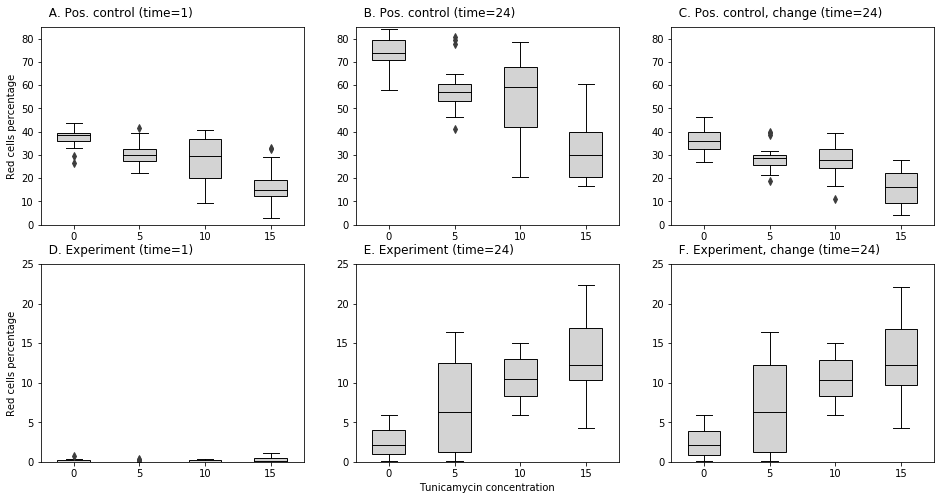

In [18]:
_, axs = plt.subplots(nrows = 2, ncols=3, figsize = (16, 8) )

g1 = sns.boxplot(x = 'Tunicamycin', y = 'Red_30_%', data = pos_rslt[
    pos_rslt.Order == 1][['Tunicamycin', 'Red_30_%']],
                 linewidth = .95, width = .5, ax = axs[0,0]);

g2 = sns.boxplot(x = 'Tunicamycin', y = 'Red_30_%', data = pos_rslt[
    pos_rslt.Order == 24][[ 'Tunicamycin', 'Red_30_%']],
                 linewidth = .95, width = .5, ax = axs[0,1]);

g3 = sns.boxplot(x = 'Tunicamycin', y = 'Red_30_%', data = tdf_red_rfp[
    tdf_red_rfp.Order == 24][['Tunicamycin', 'Red_30_%']],
                 linewidth = .95, width = .5, ax = axs[0,2]);

g4 = sns.boxplot(x = 'Tunicamycin', y = 'Red_30_%', data = exp_rslt[
    exp_rslt.Order == 1][['Tunicamycin', 'Red_30_%']],
                 linewidth = .95, width = .5, ax = axs[1,0]);

g5 = sns.boxplot(x = 'Tunicamycin', y = 'Red_30_%', data = exp_rslt[
    exp_rslt.Order == 24][['Tunicamycin', 'Red_30_%']],
                 linewidth = .95, width = .5, ax = axs[1,1]);

g6 = sns.boxplot(x = 'Tunicamycin', y = 'Red_30_%', data = tdf_red_tu[
    tdf_red_tu.Order == 24][['Tunicamycin', 'Red_30_%']],
                 linewidth = .95, width = .5, ax = axs[1,2]);

plt.setp(g1.artists, edgecolor = 'k', facecolor='lightgray')
plt.setp(g1.lines, color='k');
plt.setp(g2.artists, edgecolor = 'k', facecolor='lightgray')
plt.setp(g2.lines, color='k');
plt.setp(g3.artists, edgecolor = 'k', facecolor='lightgray')
plt.setp(g3.lines, color='k');
plt.setp(g4.artists, edgecolor = 'k', facecolor='lightgray')
plt.setp(g4.lines, color='k');
plt.setp(g5.artists, edgecolor = 'k', facecolor='lightgray')
plt.setp(g5.lines, color='k');
plt.setp(g6.artists, edgecolor = 'k', facecolor='lightgray')
plt.setp(g6.lines, color='k');

g1.set_xlabel('');
g1.set_ylabel('Red cells percentage');

g2.set_xlabel('');
g2.set_ylabel('');

g3.set_xlabel('');
g3.set_ylabel('');

g4.set_xlabel('');
g4.set_ylabel('Red cells percentage');

g5.set_xlabel('Tunicamycin concentration');
g5.set_ylabel('');

g6.set_xlabel('');
g6.set_ylabel('');

axs[0,0].set_ylim(0,85)
axs[0,1].set_ylim(0,85);
axs[0,2].set_ylim(0,85)
axs[1,0].set_ylim(0,25);
axs[1,1].set_ylim(0,25)
axs[1,2].set_ylim(0,25);

axs[0,0].set_title('  A. Pos. control (time=1)', pad = 10., loc = 'left');
axs[0,1].set_title('  B. Pos. control (time=24)', pad = 10., loc = 'left');
axs[0,2].set_title('  C. Pos. control, change (time=24)', pad = 10., loc = 'left');
axs[1,0].set_title('  \n  D. Experiment (time=1)', pad = 10., loc = 'left');
axs[1,1].set_title('  \n  E. Experiment (time=24)', pad = 10., loc = 'left');
axs[1,2].set_title('  \n  F. Experiment, change (time=24)', pad = 10., loc = 'left');


### The statistical analysis with GEE model

In [19]:
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import (Exchangeable,
                                           Independence,Autoregressive)
from statsmodels.genmod.families import Poisson, NegativeBinomial, Gaussian
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### Prepare the data table

In [20]:
tdf_red_tu['Intron'] = 1
tdf_red_tu['ID'] = tdf_red_tu['Intron'].astype('str') + tdf_red_tu['Group'] + \
                   tdf_red_tu['FoV'].astype('str') + tdf_red_tu['Tunicamycin'].astype('str')
tdf_red_tu['red_cells'] = (tdf_red_tu['Red_30_%'] * 10).apply(int) ## red cells per 1000 cells

In [21]:
tdf_red_rfp['Intron'] = 0
tdf_red_rfp['ID'] = tdf_red_rfp['Intron'].astype('str') + tdf_red_rfp['Group'] + \
                    tdf_red_rfp['FoV'].astype('str') + tdf_red_rfp['Tunicamycin'].astype('str')
tdf_red_rfp['red_cells'] = (tdf_red_rfp['Red_30_%'] * 10).apply(int) ## red cells per 1000 cells

In [22]:
tdf_red = pd.concat([tdf_red_rfp, tdf_red_tu], axis = 0, sort = False)

#### GEE with Gaussian response probability distribution

In [23]:
fam = Gaussian()
ind = sm.cov_struct.Exchangeable()
mod = GEE.from_formula('red_cells ~  Tunicamycin*Intron * Order', 'ID',
              time = 'Order', data = tdf_red,
              cov_struct=ind, family=fam)

In [24]:
res = mod.fit()
print(res.summary())

                               GEE Regression Results                              
Dep. Variable:                   red_cells   No. Observations:                 3480
Model:                                 GEE   No. clusters:                      145
Method:                        Generalized   Min. cluster size:                  24
                      Estimating Equations   Max. cluster size:                  24
Family:                           Gaussian   Mean cluster size:                24.0
Dependence structure:         Exchangeable   Num. iterations:                     2
Date:                     Sun, 22 Dec 2019   Scale:                        1421.023
Covariance type:                    robust   Time:                         23:14:14
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -20.6569      3.785     -5.457 

In [25]:
## make prediction with obtained statistical model
res.predict(pd.DataFrame.from_dict({'Tunicamycin' : 15, 'Intron' : 1, 'Order':25}, orient = 'index').T)

0    151.338167
dtype: float64

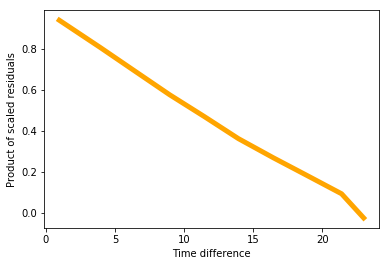

In [26]:
res.plot_isotropic_dependence();

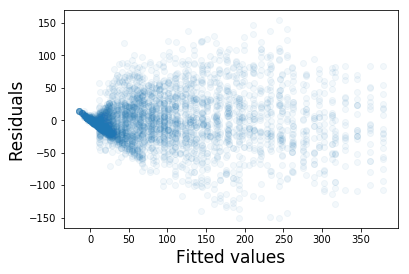

In [27]:
plt.plot(res.fittedvalues, res.resid, 'o', alpha=0.05)
plt.xlabel("Fitted values", size=17)
plt.ylabel("Residuals", size=17);

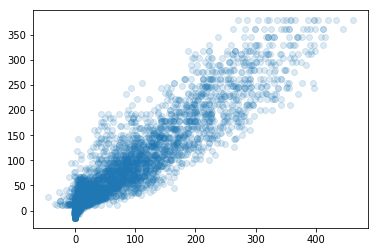

In [28]:
plt.plot(tdf_red.red_cells, res.predict(tdf_red), 'o', alpha = 0.15);

In [29]:
np.corrcoef(tdf_red.red_cells, res.predict(tdf_red))**2

array([[1.        , 0.84797724],
       [0.84797724, 1.        ]])

#### GEE with Poisson response probability distribution and autoregressive covariance structure

In [30]:
fam = Poisson()
ind = sm.cov_struct.Autoregressive()
mod_poi = GEE.from_formula('red_cells ~  Tunicamycin*Intron * Order', 'ID',
              time = 'Order', data = tdf_red,# [~rslt_sorted3050.Well.isin(['A1'])],
              cov_struct=ind, family=fam)

In [31]:
res_poi = mod_poi.fit(1000)
print(res_poi.summary())

                               GEE Regression Results                              
Dep. Variable:                   red_cells   No. Observations:                 3480
Model:                                 GEE   No. clusters:                      145
Method:                        Generalized   Min. cluster size:                  24
                      Estimating Equations   Max. cluster size:                  24
Family:                            Poisson   Mean cluster size:                24.0
Dependence structure:       Autoregressive   Num. iterations:                    35
Date:                     Sun, 22 Dec 2019   Scale:                           1.000
Covariance type:                    robust   Time:                         23:14:24
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    3.9874      0.044     91.633 

In [32]:
## make prediction with obtained statistical model
res_poi.predict(pd.DataFrame.from_dict({'Tunicamycin' : 15, 'Intron' : 1, 'Order':25}, orient = 'index').T)

0    156.682393
dtype: float64

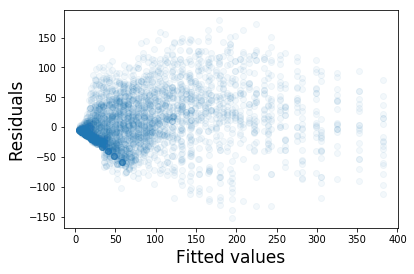

In [33]:
plt.plot(res_poi.fittedvalues, res_poi.resid, 'o', alpha=0.05)
plt.xlabel("Fitted values", size=17)
plt.ylabel("Residuals", size=17);

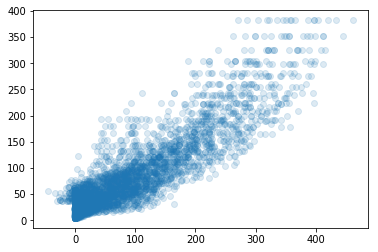

In [34]:
plt.plot(tdf_red.red_cells, res_poi.predict(tdf_red), 'o', alpha = 0.15);

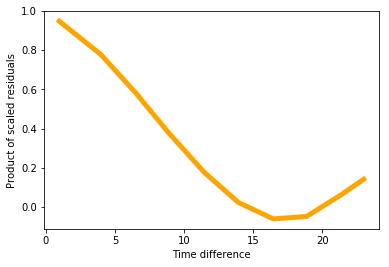

In [35]:
res_poi.plot_isotropic_dependence();

In [36]:
res_poi.wald_test_terms()

<class 'statsmodels.stats.contrast.WaldTestResults'>
                                 chi2        P>chi2  df constraint
Intercept                 8396.601097  0.000000e+00              1
Tunicamycin                 25.261037  5.007223e-07              1
Intron                     399.368524  7.557868e-89              1
Tunicamycin:Intron         133.541736  6.882062e-31              1
Order                     2988.042458  0.000000e+00              1
Tunicamycin:Order            1.871444  1.713098e-01              1
Intron:Order                 8.150972  4.303810e-03              1
Tunicamycin:Intron:Order     0.019167  8.898877e-01              1

In [37]:
res.wald_test_terms()

<class 'statsmodels.stats.contrast.WaldTestResults'>
                                 chi2         P>chi2  df constraint
Intercept                   29.783813   4.830080e-08              1
Tunicamycin                  7.386868   6.570178e-03              1
Intron                      15.692983   7.450005e-05              1
Tunicamycin:Intron          27.244228   1.793096e-07              1
Order                     1177.020583  6.017384e-258              1
Tunicamycin:Order           69.537157   7.498846e-17              1
Intron:Order               682.528858  1.883593e-150              1
Tunicamycin:Intron:Order   145.687222   1.519566e-33              1

In [38]:
from sinfo import sinfo
sinfo()